<a href="https://colab.research.google.com/github/leahhkim/DS3021Final/blob/main/Final_Draft_ML_Final_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Answering a data driven question by deploying the data science lifecycle
# Predicting Happiness Scores: Analyzing Social and Economic Factors

Emujin Batzorig, Anna Yao, Leah Kim

## Background

### Question: **Which factors are the strongest predictors of a country’s happiness score? Specifically, are personal and social factors—such as family support and individual freedom—more predictive of happiness than purely economic indicators like GDP per capita? What are the most important features in predicting happiness?**

These questions will be helpful in informing users what factors to consider focusing on if they want to increase someone's happiness score.

Our dataset is from the World Happiness Report which is a survey that was conducted several times in the 2010s. It ranks 155 countries by their happiness levels along with other economical and personal metrics. This dataset has been used by leading policy makers, economists, and health professionals to inform their decisions.

Our model informs what factors are predictive of happiness score. This can be used in many cases including mental health professionals in helping them make informed recommendations for their patients on helping them increase their happiness level. Another example of our model usage would be that it could be informative (of important variables and strongly correlated features) to the policy makers to decide what factors to focus and spend the funding on to increase the overall happiness of their residents by.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,RepeatedKFold,GridSearchCV

# load the data
happiness = pd.read_csv("https://raw.githubusercontent.com/leahhkim/DS3021Final/refs/heads/main/2019.csv")
columns_to_keep = ['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual' ]
happiness = happiness[columns_to_keep]
happiness.head()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


## Exploratory Data Analysis

In [ ]:
# data types are all float -- don't need to be converted
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness.Score                155 non-null    float64
 1   Economy..GDP.per.Capita.       155 non-null    float64
 2   Family                         155 non-null    float64
 3   Health..Life.Expectancy.       155 non-null    float64
 4   Freedom                        155 non-null    float64
 5   Generosity                     155 non-null    float64
 6   Trust..Government.Corruption.  155 non-null    float64
 7   Dystopia.Residual              155 non-null    float64
dtypes: float64(8)
memory usage: 9.8 KB


In [ ]:
# no missing data
happiness.isnull().sum()

,0
Happiness.Score,0
Economy..GDP.per.Capita.,0
Family,0
Health..Life.Expectancy.,0
Freedom,0
Generosity,0
Trust..Government.Corruption.,0
Dystopia.Residual,0



### Notes:

Our data is very clean to begin with which completes the data cleaning step for us. There is no null values, the data types are appropriate, and we normalized the data to ensure consistent scaling.

Then, we used a simple pairplot to explore linear relatinships, outliers, and distribution of each variables.

Happiness score (target variable) is normally distrubuted which is good. This means we don't have to transform the data.

<function matplotlib.pyplot.show(close=None, block=None)>

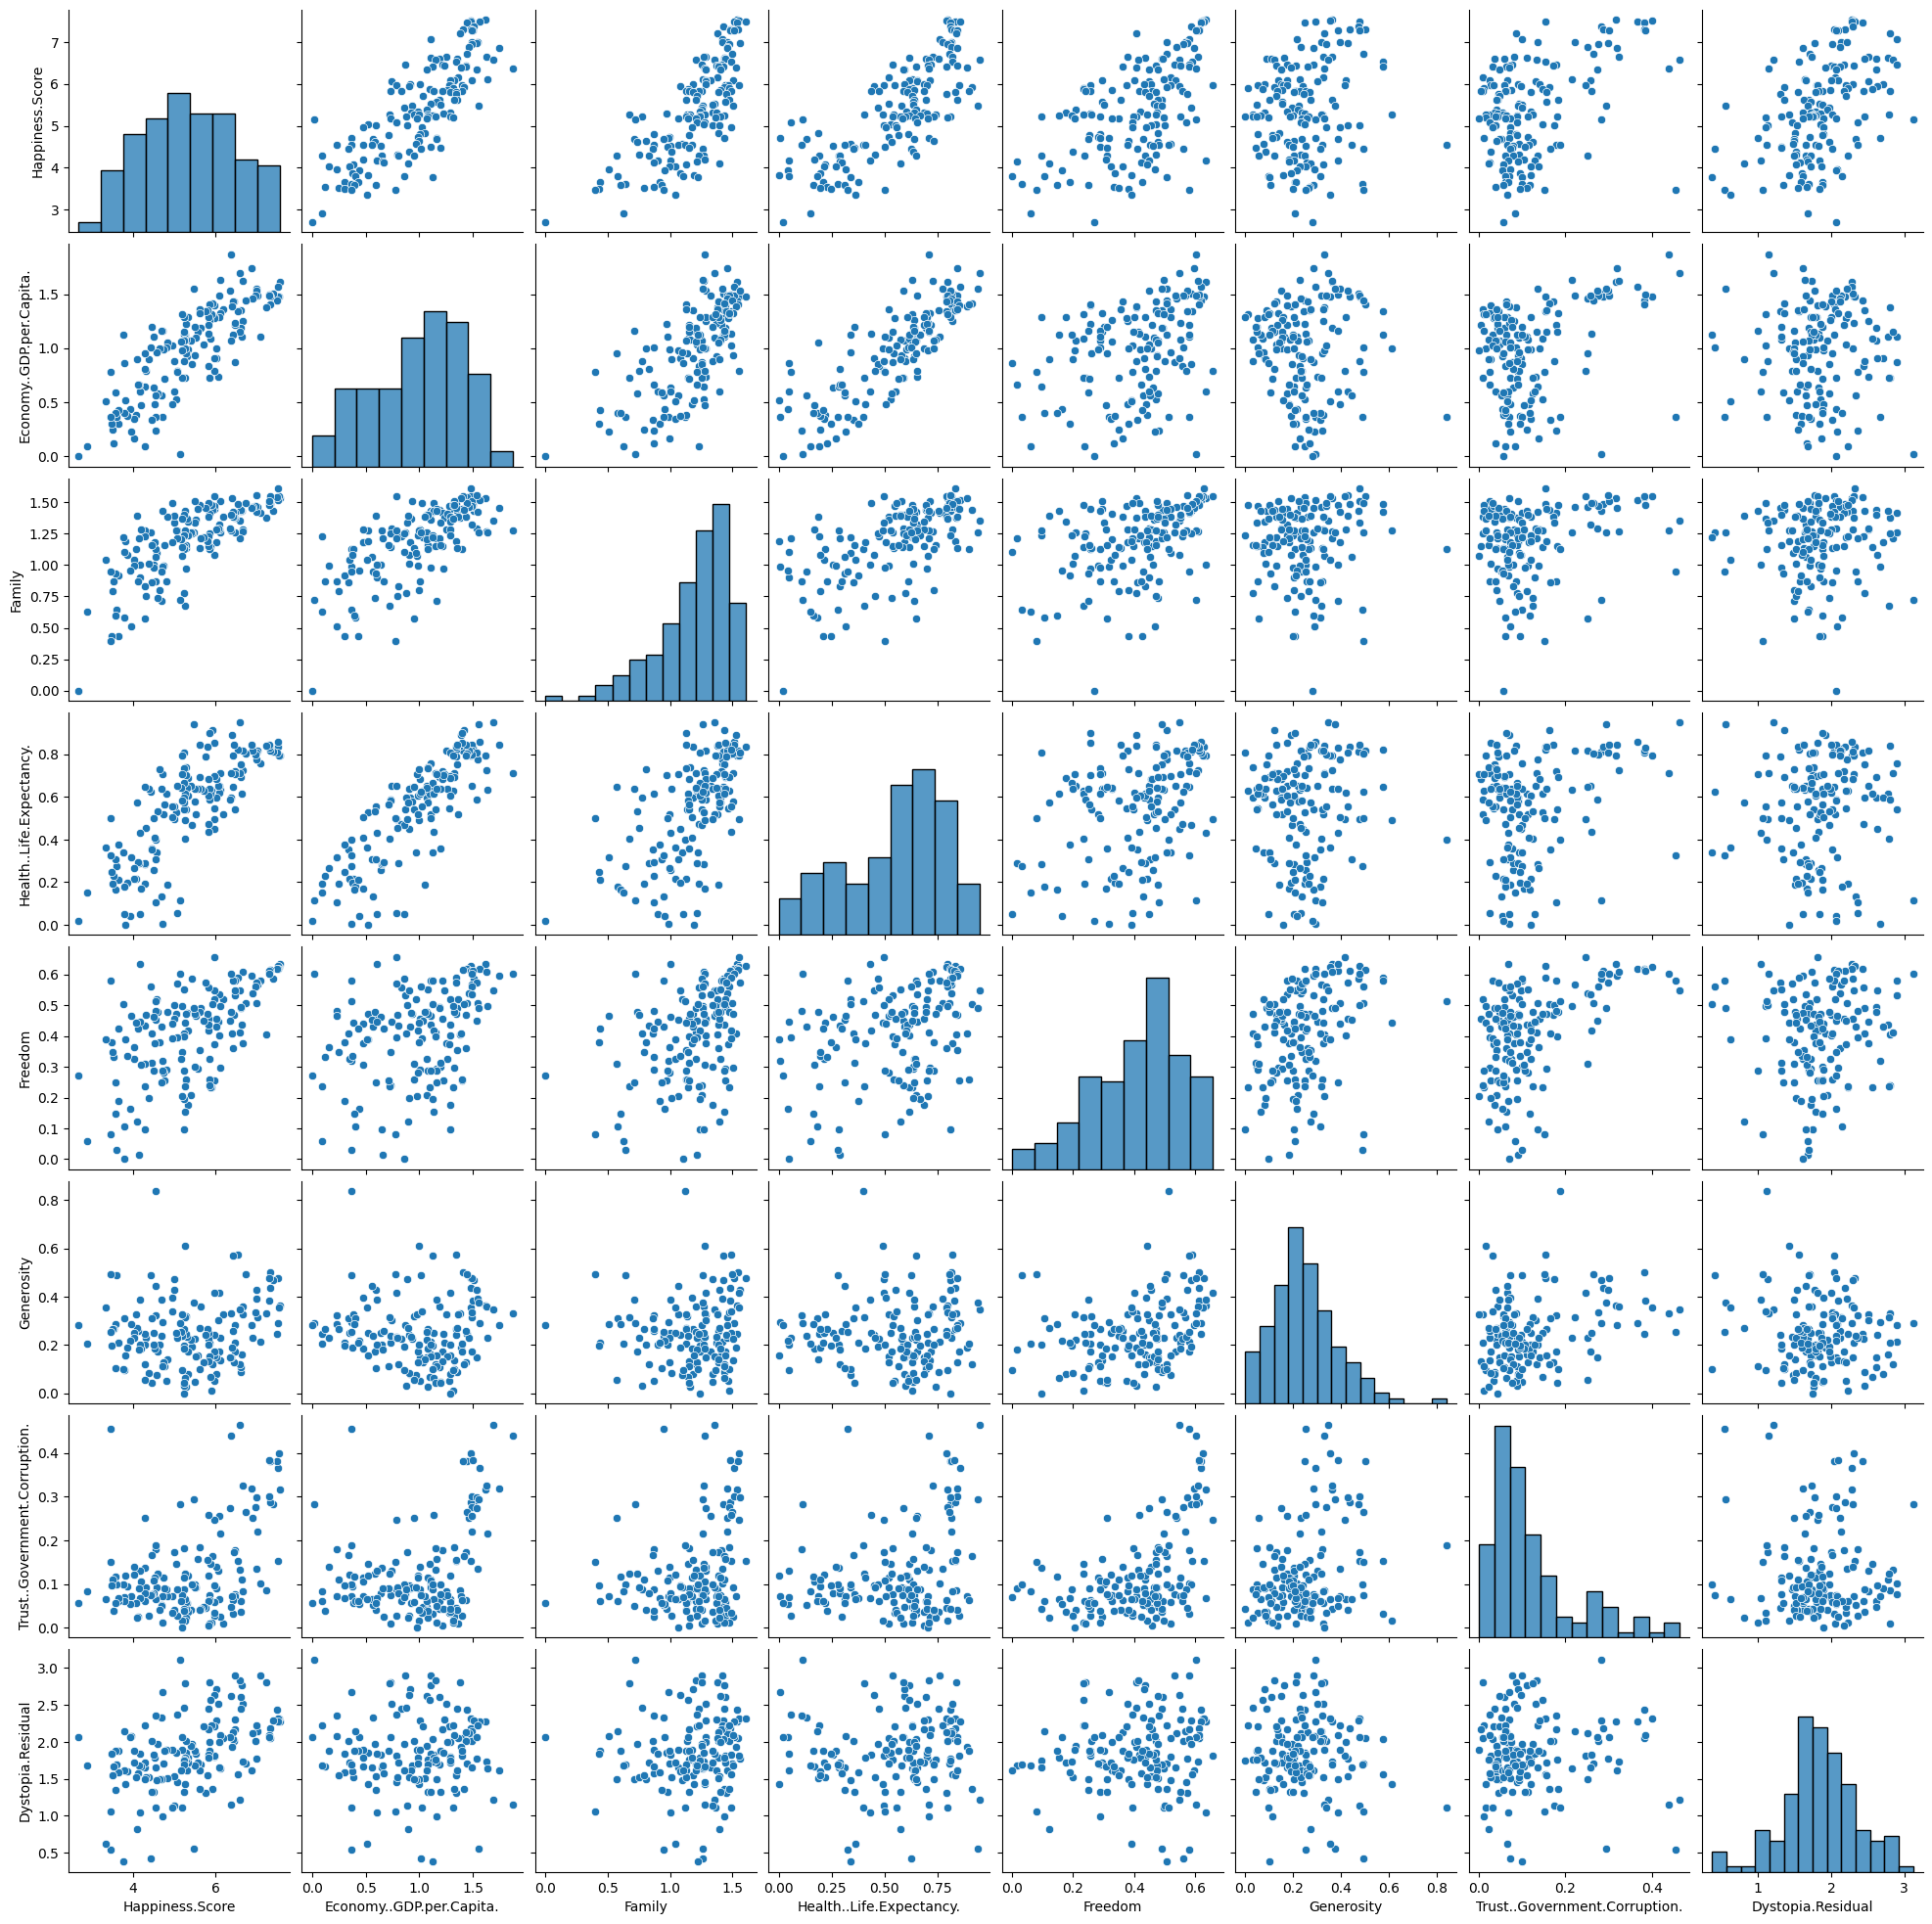

In [ ]:
sns.pairplot(happiness)
plt.show

## Methods

Linear Regression Models: Block Regression of Social, Economic, and Combined Features

In [ ]:
# normalizing the data because we'll be analyzing the coefficients of each variables

X = happiness.drop(columns=['Happiness.Score'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

### Social Features

In [ ]:
#set up the dataframe, dropping happiness score since that is what we are predicting, dropping everything except for personal factors
y = happiness['Happiness.Score']
social_feat = X_scaled_df.drop(columns=['Economy..GDP.per.Capita.', 'Trust..Government.Corruption.'])

#80/20 training and test set
X_train, X_test, y_train, y_test = train_test_split(social_feat, y, test_size=0.2, random_state= 42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2:' ,r2, 'rmse: ', rmse)
print('Coefficient: ', model.coef_)

r2: 0.9553359912701653 rmse:  0.2408766137756943
Coefficient:  [2.20122327 2.14894405 0.95618053 0.6777744  2.60627571]


Text(0, 0.5, 'Predicted')

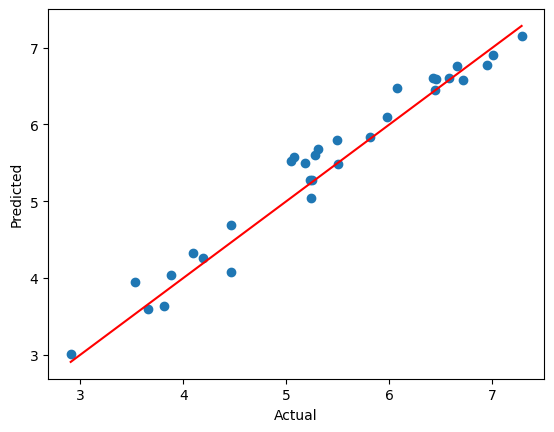

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")

### Economic Features

In [ ]:
# this time, we'll only use economical data and attempt to accurately predict
# the happiness score
# these are the columns or variables that will be used in this modeling

y = happiness['Happiness.Score']
economic_dat = X_scaled_df.drop(columns=['Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Dystopia.Residual'])

#80/20 training and test set
X_train, X_test, y_train, y_test = train_test_split(economic_dat, y, test_size=0.2, random_state= 42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2:' ,r2, 'rmse: ', rmse)
print('Coefficient: ', model.coef_)

r2: 0.7463411377901314 rmse:  0.574038217829717
Coefficient:  [3.74008554 0.77401226]


Text(0, 0.5, 'Predicted')

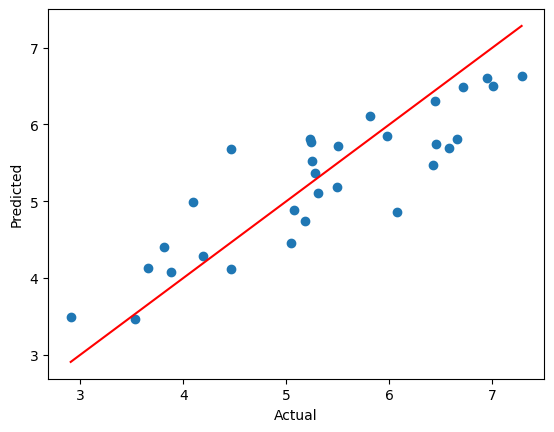

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")

### Combined Features

In [ ]:
y = happiness['Happiness.Score']

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print('r2:' ,r2, 'rmse: ', rmse)
print('Coefficient: ', model.coef_)

r2: 0.9999999207126187 rmse:  0.0003209355485783873
Coefficient:  [1.87106646 1.61042736 0.94931359 0.65831901 0.83833154 0.464154
 2.73943178]


Text(0, 0.5, 'Predicted')

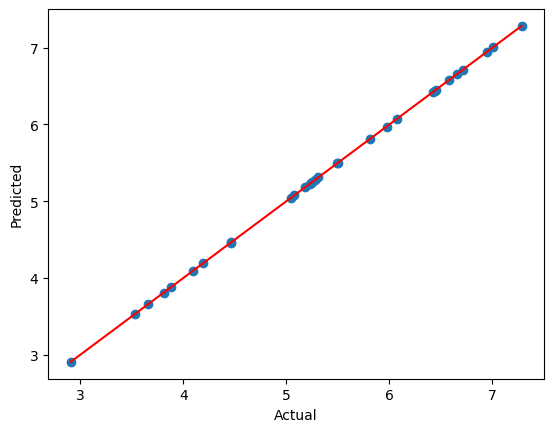

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")

### Regression Tree: Variable Importance

Our linear regression model showed a much higher r^2 value and lower rmse when just using social features compared to economic. To further analyze our question, we will use a regression tree to find factor importance.

In [ ]:
happiness1 = happiness.drop(columns=['Happiness.Score'])

#80/20 training and test set
X_train, X_test, y_train, y_test = train_test_split(happiness1, y, test_size=0.2, random_state= 42)

kf =RepeatedKFold(n_splits=10,n_repeats =5, random_state=42)
param={
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
        }

# %%
#Define score, what score will the splits and parameters be judged by? Here we will pass several, what do they measure?
scoring= ['neg_mean_squared_error','r2','neg_mean_absolute_error']

reg=DecisionTreeRegressor(random_state=30, criterion='squared_error')

#using grid search to find the best scoring and parameter
search = GridSearchCV(reg, param, scoring=scoring, n_jobs=-1, cv=kf,refit='r2')

model = search.fit(X_train, y_train)
best = model.best_estimator_
print(model.best_estimator_)
print("Best parameters: ",model.best_params_)
print("Best score: ", model.best_score_)

varimp=pd.DataFrame(best.feature_importances_,index = happiness1.columns,columns=['importance']).sort_values('importance', ascending=False)
print(varimp)

DecisionTreeRegressor(max_depth=6, random_state=30)
Best parameters:  {'max_depth': 6}
Best score:  0.7309364416205861
                               importance
Family                           0.534749
Dystopia.Residual                0.145145
Economy..GDP.per.Capita.         0.144475
Health..Life.Expectancy.         0.106044
Freedom                          0.065050
Trust..Government.Corruption.    0.003565
Generosity                       0.000972


It appears that family is the most impactful predictor for happiness from the above regression tree.

### Linear Regression Model Without Family Feature

Now that we know family is a key predictor in our model, we will try running one last linear regression model without family to see how much our model is impacted.

In [ ]:
#set up the dataframe, dropping happiness score since that is what we are predicting, dropping everything except for personal factors
happiness2 = X_scaled_df.drop(columns=['Family'])

#80/20 training and test set
X_train, X_test, y_train, y_test = train_test_split(happiness2, y, test_size=0.2, random_state= 42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('r2:' ,r2, 'rmse: ', rmse)
print('Coefficient: ', model.coef_)

r2: 0.9710988768343847 rmse:  0.19376402519804223
Coefficient:  [2.67682487 0.98698944 0.98807626 0.89243246 0.3002324  2.84404177]


Text(0, 0.5, 'Predicted')

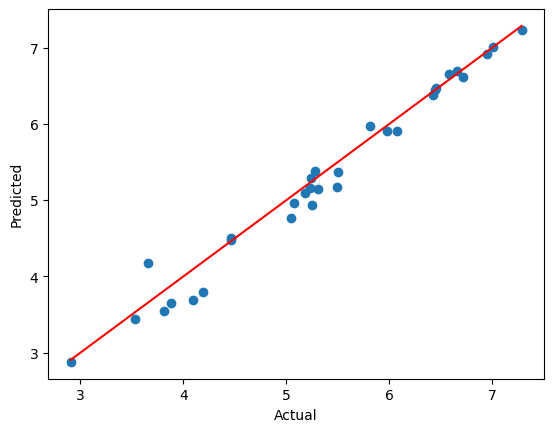

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Evaluation

The R2 (coefficient of determination) measures the proportion of variance in the target variable (happiness score) that is explained by the features. A higher R2 value indicates better model performance.

Using only social features, the model had an R2 of **0.95**, while using only economic features resulted in an R2 of **0.74**.
--> This suggests that **social factors explain the variation in happiness scores more effectively than economic factors.**
When all features were combined, the R² increased to **0.99**, indicating that a model including both social and economic variables performs best overall.

To see if our model is heavily dependent on the most important variable, we dropped 'Family', which had the highest variable importance. The R² dropped slightly to 0.971, a decrease of only 0.02, which is not a substantial reduction in model performance.

The RMSE (Root Mean Squared Error) is the average prediction error in the same units as the target variable (happiness score which ranges from 0 to 10).

Before dropping ‘Family’, the RMSE was 0.0003, which is an extremely high accuracy.
After dropping ‘Family’, the RMSE increased to 0.19, which means the average prediction error increased, but it's still very low relative to the target scale.
 --> This further supports that the model remains reliable, even with the highest importance feature removed.

# Conclusion

We now know which variables are the most predictive of the happiness score from the variable importance rank -- Family, Dystopia Residual, and Economy GDP Per Capita.

We also know that which variables affect the target variable the most (one unit increase in the variable results in the most change in target variable) from the coefficients -- Dystopia residual having the highest coef, then Economy GDP Per Capita, then Family.

Our model is predictive, not causal. We cannot claim that a variable causes higher happiness, only that it is associated with it. Another limitation of this model is that happiness is subjective and may be reported differently across cultures. Our analysis did not account for this variation, which may introduce bias to our prediction. Given these limitations, users of this model should not make decisions solely based on the model predictions, but rather take it into consideration when making decisions. Overall, our project successfully identifies the most important features and greatest coefficients which are both helpful in keeping in mind when attempting to change the nge happiness score. Additionally, our model predicts the happiness score based on the given 7 variables with high accuracy.

# Future Work

Our analysis of this data was limited by the scarce number of features to work with. While we had enough to create our models and analyze our question well, further analysis could be done if we had more economic features or other feature categories to go off of, such as education quality or birth rate. Also, the dataset we worked with only came from 2019 - further analysis could be done by exploring more data across time. It would be interesting to further explore the importance of family as a feature given the country or region. Do certain countries have a higher feature importance statistic towards family than others?